<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/Chapter_3_computer_vision_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG

--2024-08-07 17:21:12--  https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lfn1fjim493ycyfn3868e/MyImage.JPG?rlkey=bocohku3vyl05evm59vq8fezx [following]
--2024-08-07 17:21:13--  https://www.dropbox.com/scl/fi/lfn1fjim493ycyfn3868e/MyImage.JPG?rlkey=bocohku3vyl05evm59vq8fezx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4995d1cf40264c469a5222772.dl.dropboxusercontent.com/cd/0/inline/CYOYlFK3RDTLEwrBhedn3Oe329vF-UvOp0kcOWrjhr3GP1rJyOUx5Kgfq6ep_XcjQC-OQLUC8ubROU2GnnqB4K8nw-Te9mKaR3DSfwWIendLvi7UeMHmH8tyvzkrDARDv9GQ5FbtGTr0w8L9NhJ2ViCm/file# [following]
--2024-08-07 17:21:14--  https://ucd4995d1cf40264c469a5222772.dl.dropboxusercontent.com/cd/0/inline/C

In [2]:
%matplotlib inline
import cv2, matplotlib.pyplot as plt
img_path='/content/MyImage.JPG'
img = cv2.imread(img_path)


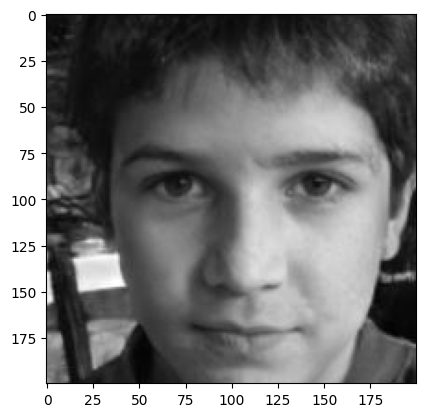

In [3]:
if img is None:
    print(f"Error: Could not read the image file '{img_path}'")
else:
    img = img[50:250,40:240]
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Show image
    plt.imshow(img_gray, cmap='gray')
    plt.show()

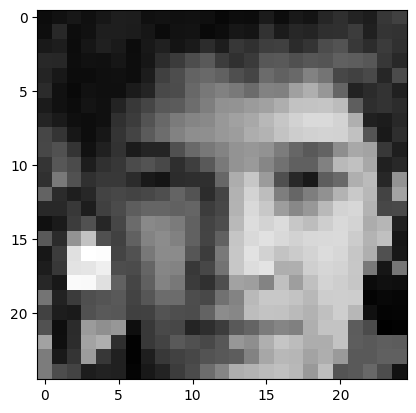

In [4]:
img_gray_small = cv2.resize(img_gray,(25,25))
plt.imshow(img_gray_small, cmap='gray')


In [5]:
print(img_gray_small)

[[ 21  26  31  25  31  38  37  25  27  25  26  24  18  22  21  35  22  33
   29  45  53  42  37  60  69]
 [ 23  47  22  26  38  38  36  30  20  27  28  19  22  31  29  56  35  46
   43  53  55  65  40  58  56]
 [ 33  37  21  30  39  34  21  32  40  29  34  50  37  60  54  67  68  49
   58  79  86  62  51  64  54]
 [ 47  46  22  26  25  30  22  30  50  64  80  91  65  54  63  89  91  83
   89  87  97  95  89  60  47]
 [ 44  32  21  21  24  25  22  36  68  80 100 106  99  82  73 107  99 106
  128 116  75  70  77  45  78]
 [ 49  26  19  26  24  24  35  43  77  79 105 119 127 120 107 128 126 155
  169 147 102  41  49  57  39]
 [ 35  26  21  29  25  42  61  73  90  93 109 125 142 144 151 156 168 186
  188 189 181  96  52  57  51]
 [ 43  34  24  22  25  55  66  86 105 122 131 135 148 156 163 177 190 201
  208 208 202 169  39  36  47]
 [ 74  58  31  22  31  58  72  93 109 128 139 140 148 153 167 174 187 196
  200 203 201 185  87  33  52]
 [ 75  84  58  26  39  56  35  44  43  83 106 119 129 1

In [6]:
from torchvision import datasets
import torch
fmist=datasets.FashionMNIST(root='data',download=True)

100%|██████████| 26421880/26421880 [00:12<00:00, 2042438.37it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170712.00it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3115020.71it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6585018.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
tr_images=fmist.data
tr_targets=fmist.targets

In [8]:

unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX - {tr_images.shape}\n\tY - {tr_targets.shape}\n\tY - Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmist.classes}')

tr_images & tr_targets:
	X - torch.Size([60000, 28, 28])
	Y - torch.Size([60000])
	Y - Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


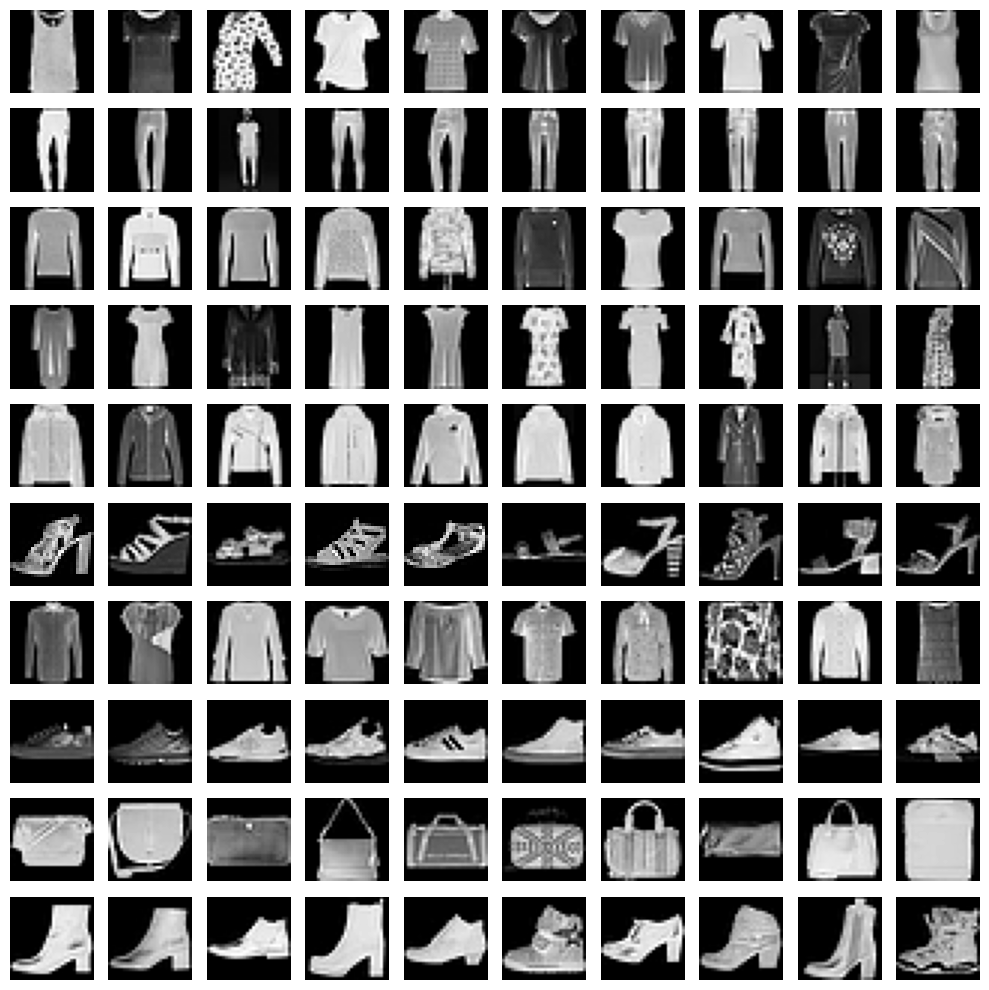

In [10]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()



In [11]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
from torch.optim import SGD
from torchvision import datasets

In [12]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [13]:
class FmnistDataset(Dataset):
    def __init__(self, x, y):
      x=x.float()
      x=x.view(-1,28*28)
      self.x, self.y=x,y
    def __len__(self):
      return len(self.x)
    def __getitem__(self,idx):
      x, y = self.x[ix], self.y[ix]
      return x.to(device), y.to(device)



In [24]:
def getdata():
  train=FMNISTdataset2(tr_images,tr_targets)
  trn_dl=DataLoader(train,batch_size=32,shuffle=True)
  return trn_dl

In [25]:
def get_model():
  model=nn.Sequential(
      nn.Linear(28*28,1000),
      nn.ReLU(),
      nn.Linear(1000,10)
  ).to(device)
  loss_fn=nn.CrossEntropyLoss()
  opt=SGD(model.parameters(),lr=0.01)
  return model, loss_fn, opt

In [26]:
def train_batch(x,y,model,loss_fn, opt):
  model.train()
  pred=model(x)
  loss=loss_fn(pred,y)
  opt.zero_grad()

  loss.backward()
  opt.step()
  return loss.item()


In [27]:
@torch.no_grad()
def model_accuracy(x,y,model):
  """
  args:
    x:x
    y:y
    model: model
  returns:
  accuracy
  """
  model.eval()
  pred=model(x)
  max_values, argmaxes=pred.max(-1)
  is_correct=argmaxes==y
  return is_correct.cpu().numpy().tolist()

In [28]:
@torch.no_grad()
def val_loss(x,y,model):
  model.eval()
  pred=model(x)
  loss=loss_fn(pred,y)
  return loss.item()

In [29]:
trn_dl=getdata()
model, loss_fn, opt=get_model()

In [30]:
losses, accuracies=[],[]
for epoch in range(5):
  print(epoch)
  epoch_losses, epoch_acc=[],[]
  for ix,batch in enumerate(iter(trn_dl)):
    x,y=batch
    batch_loss=train_batch(x,y,model,loss_fn,opt)
    epoch_losses.append(batch_loss)
  epoch_loss = np.array(epoch_losses).mean()
  for ix,batch in enumerate(iter(trn_dl)):
    x,y=batch
    accur=model_accuracy(x,y,model)
    epoch_acc.extend(accur)
  epoch_ac=np.mean(epoch_acc)
  losses.append(epoch_loss)
  accuracies.append(epoch_ac)


0
1
2
3
4


In [31]:
losses

[0.8439159208933512,
 0.5370933064301808,
 0.48308512605031334,
 0.454650030597051,
 0.43505294785896936]

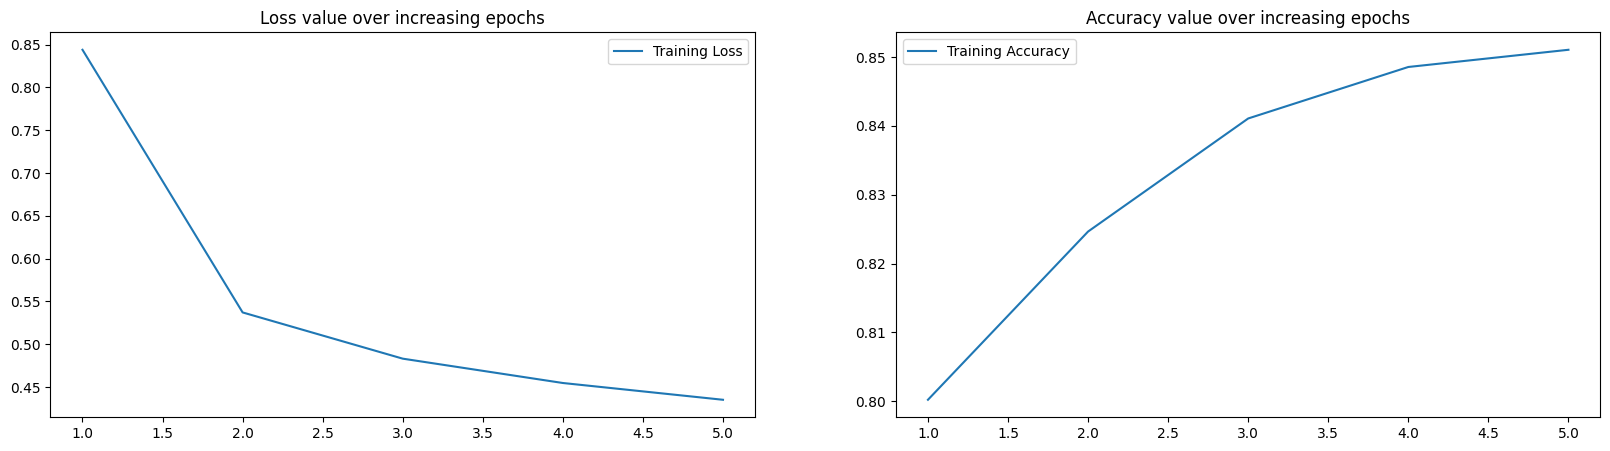

In [32]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()


In [33]:
class FMNISTdataset2(Dataset):
  def __init__(self,x,y):
    x=x.float()/255
    x=x.view(-1,28*28)
    self.x,self.y=x,y
  def __getitem__(self,idx):
    x,y=self.x[idx],self.y[idx]
    return x.to(device),y.to(device)
  def __len__(self):
    return len(self.x)